In [1]:
using WignerSymbols, PyPlot, LaTeXStrings, DelimitedFiles, LinearAlgebra
using PyCall
LineCollection = matplotlib.collections.LineCollection

PyObject <class 'matplotlib.collections.LineCollection'>

In [2]:
const mₑ = 9.109E-31
const c = 2.997E8
const ħ = 1.05457E-34
const e = 1.6022E-19
const a₀ = 5.29177E-11
const ϵ₀ = 8.8542E-12
const au_pol = 1.65E-41
const Eh = ħ^2 / (mₑ * a₀^2)    # Hartree energy
const Ia = 0;                    # Nuclear spin

toω(λ) = 2*π*137 / λ   # in a.u.
toλ(ω) = 2*π*c/ω;

The reduced matrix element depends on the oscillator strength $A_{ik}$ through

$|\langle n'J' || \mathbf{d} || nJ \rangle |^2 = \frac{3\pi\epsilon_0\hbar c^3}{\omega_{ik}^3} (2J' + 1) A_{ik}.$

The oscillator strengths can be obtained through the [NIST database](https://physics.nist.gov/cgi-bin/ASD/lines_hold.pl?el=Dy) (click "Dy I," they're labeled $A_{ki}$ in that table).

Following the conventions of Le Kien and other literature, we absorb $\sqrt{2J+1}$ into the reduced matrix element.

In [39]:
linesdat = readdlm("J9_15972cm1_Spectre-Eexp.txt", Float64);

In [40]:
Jps = linesdat[:, 2]
Js = linesdat[:, 1]
Γs = linesdat[:, 5]
λs = 2*π * 137 ./ linesdat[:, 3]
redMatEls = sqrt.( linesdat[:, 4] );

Γ′s = c*Γs/a₀/137;
λ′s = λs*a₀*1e9
ω′s=2*pi*c*1e9 ./λ′s;

In [37]:

println(Γ′s[482])

println(Γ′s[482]/(2*pi))

print(λ′s[482])


BSS=ω′s .^3/(3*pi*ϵ₀*ħ*c^3)./(2 .*Jps.+1) .* redMatEls.^2 .*(e*a₀)^2

BSS[482]

1.3699910185557524e7
2.1804084259464853e6
202.17294999342678

0.5369750195672116

In [30]:
println(λ′s[481])

println(Γ′s[481]/(2*pi))
println(Γ′s[481])
BSS[481]

740.7704310604076
1779.0658973323164
11178.200706622676


11202.178033730415

In [31]:
println(λ′s[486])

println(Γ′s[486]/(2*pi))
println(Γ′s[486])
BSS[486]

421.1800229693328
3.3383803117840867e7
2.097566212477938e8


2.0739001047876197e8

In [8]:
function α(K, J, ω)
    prefac = Complex(-1)^(K + J + 1) * sqrt(2*K + 1)
    terms = [Complex(-1)^Jp * wigner6j(1, K, 1, J, Jp, J) * redMatEl^2 * ( 1/(toω(λ) - ω - 1im * γ/2) + (-1)^K/(toω(λ) + ω + 1im * γ/2) ) for (Jp, redMatEl, λ, γ) ∈ zip(Jps, redMatEls, λs, Γs) ]
    s = sum(terms)
    return (prefac * s)
end

αs(ω) = 1/sqrt(3 * (2*Js[1] + 1) ) * α(0, Js[1], ω) 
αv(ω) = sqrt(2*Js[1] / ( (Js[1] + 1)*(2*Js[1] + 1) )) * α(1, Js[1], ω)
αt(ω) = -sqrt( 2*Js[1] * (2*Js[1] - 1) / ( 3*(Js[1] + 1) * (2*Js[1] + 1) * (2*Js[1] + 3) ) ) * α(2, Js[1], ω);

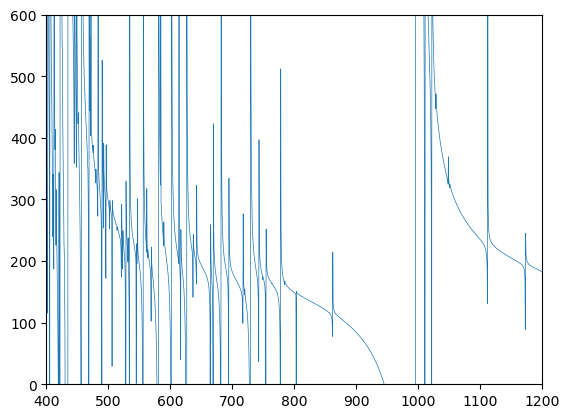

(400.0, 1200.0)

In [9]:
fig, ax = plt.subplots()
λsp = [400:0.5:1200;]*1e-9

ax.plot(λsp * 1e9, real.([αs(toω(λ / a₀)) for λ ∈ λsp]), label = "Us", lw = 0.5)
ax.set_ylim([0, 600])
ax.set_xlim([400, 1200])

In [32]:
# Concatenate the vectors horizontally into a matrix
matrix = hcat(linesdat, round.(λ′s,digits=0), round.(Γ′s ./(2*pi),digits=0) )

# Define the filename for the output text file
output_file = "GStransition_detailed.txt"

# Write the matrix to the text file with a suitable delimiter (e.g., comma ',')
writedlm(output_file, matrix, ",")

# Optionally, you can add a header line to indicate the columns (optional)
header = "J, Jp,  transition energy (au), line strength (au), the level inverse lifetime (au), transition energy (nm) ,linewidth (Hz)"
open(output_file, "w") do io
    println(io, header)
    writedlm(io, matrix, ',')
end

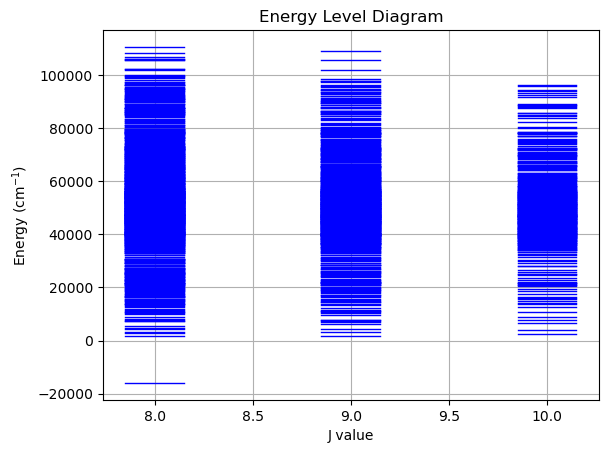

In [41]:
# Sample data: Energy levels and corresponding quantized angular momentum (n)
energy_levels = 1e7 ./ λ′s
quantized_angular_momentum = Jps

# Create the energy level diagram using PyPlot with horizontal platforms (rotated by 90 degrees)
figure()
for i in 1:length(energy_levels)
    plot([quantized_angular_momentum[i]-0.15, quantized_angular_momentum[i]+0.15], [energy_levels[i], energy_levels[i]], color="b", linewidth=1)
end

xlabel("J value")
ylabel(L"Energy (cm$^{-1}$)")
title("Energy Level Diagram")
grid(true)

# Save the plot to a file (optional)
savefig("626excited_transition.png")

# Show the plot
show()


In [44]:
0.01/13496

7.409602845287493e-7